In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import visualkeras as visualkeras
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
import visualkeras

In [3]:
labels_csv = pd.read_csv('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\\Codes\\Dog-Breed-Classification-using-Ensemble-Pretrained-Models-main\\labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]
data_train = pathlib.Path('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\Dataset\\120dog breeds-224\\train')
data_test = pathlib.Path('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\Dataset\\120dog breeds-224\\train')

In [4]:
batch_size = 16
img_size = 224

In [5]:
datagen = ImageDataGenerator(preprocessing_function = keras.applications.vgg16.preprocess_input, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="validation",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [6]:
vgg16 = applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in vgg16.layers:
    layer.trainable=False

model = Sequential()
model.add(vgg16)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4, rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [7]:
history_vgg = model.fit(train_generator, epochs=50, verbose = 1,
                        validation_data=validation_generator)

Epoch 1/50
512/512 [==============================] - 801s 2s/step - loss: 3.9830 - accuracy: 0.1124 - val_loss: 2.2492 - val_accuracy: 0.4388
Epoch 2/50
512/512 [==============================] - 851s 2s/step - loss: 2.7728 - accuracy: 0.2783 - val_loss: 1.6821 - val_accuracy: 0.5523
Epoch 3/50
512/512 [==============================] - 790s 2s/step - loss: 2.4260 - accuracy: 0.3483 - val_loss: 1.4943 - val_accuracy: 0.6047
Epoch 4/50
512/512 [==============================] - 791s 2s/step - loss: 2.2334 - accuracy: 0.3906 - val_loss: 1.4138 - val_accuracy: 0.6076
Epoch 5/50
512/512 [==============================] - 782s 2s/step - loss: 2.1371 - accuracy: 0.4180 - val_loss: 1.3607 - val_accuracy: 0.6155
Epoch 6/50
512/512 [==============================] - 782s 2s/step - loss: 2.0380 - accuracy: 0.4408 - val_loss: 1.3055 - val_accuracy: 0.6238
Epoch 7/50
512/512 [==============================] - 791s 2s/step - loss: 1.9776 - accuracy: 0.4560 - val_loss: 1.3012 - val_accuracy: 0.6306

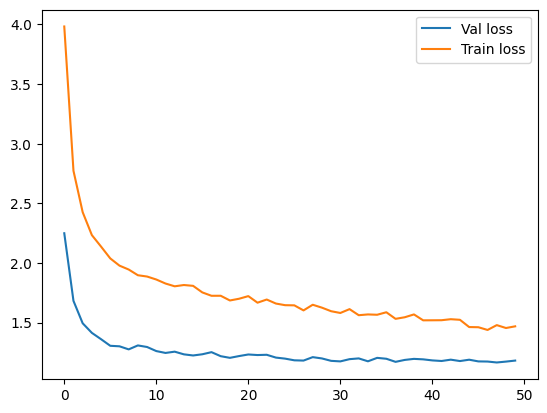

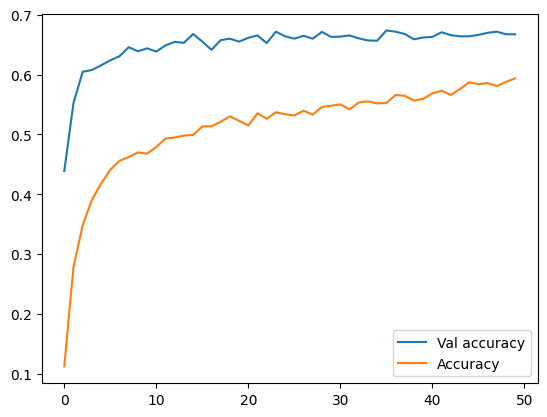

In [9]:
plt.figure()
plt.plot(history_vgg .history['val_loss'], label = 'Val loss')
plt.plot(history_vgg .history['loss'], label = 'Train loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(history_vgg .history['val_accuracy'], label = 'Val accuracy')
plt.plot(history_vgg .history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

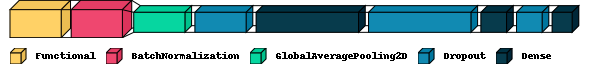

In [10]:
visualkeras.layered_view(model,  legend=True)